<a href="https://colab.research.google.com/github/sebastianduhe/Introduccion-a-la-IA/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORACION DE LOS DATOS, ENTREGA 01

## Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Descargar datos directamente desde Kaggle.

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

chmod: cannot access './kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in .. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


Descomprimir y examinar datos

In [ ]:
!unzip udea*.zip > /dev/null

unzip:  cannot find or open udea*.zip, udea*.zip.zip or udea*.zip.ZIP.

No zipfiles found.


In [ ]:
!wc *.csv

wc: '*.csv': No such file or directory


Cargar los datos del excel train.csv con la libreria Pandas

In [ ]:
z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


Formacion academica de las madres

Text(0.5, 1.0, 'Educación de la Madre')

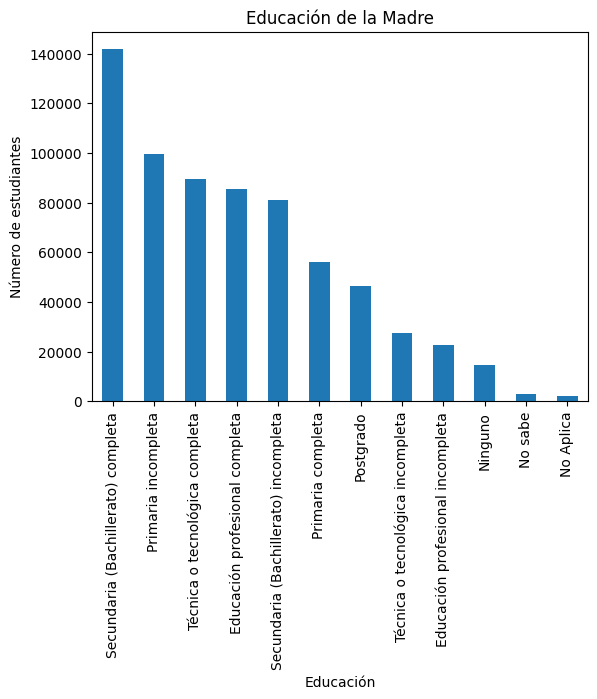

In [ ]:
z.FAMI_EDUCACIONMADRE.value_counts().plot(kind='bar')
plt.xlabel("Educación")
plt.ylabel("Número de estudiantes")
plt.title("Educación de la Madre")

Formacion academica de los padres

Text(0.5, 1.0, 'Estudio del Padre')

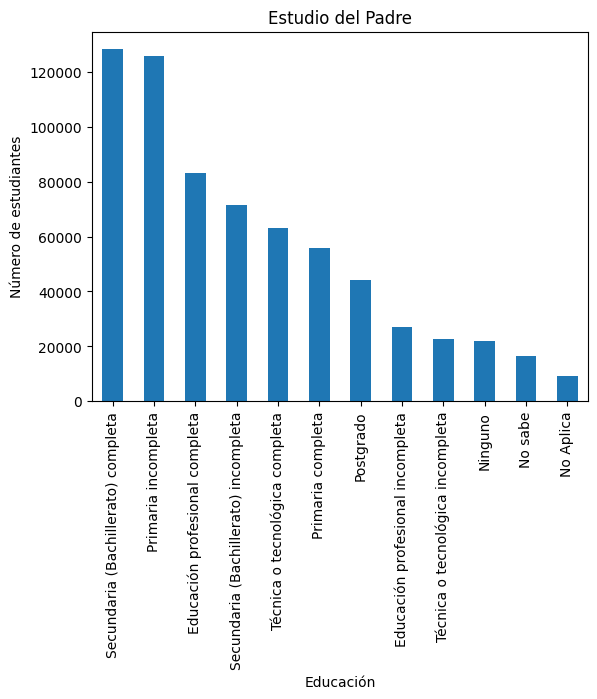

In [ ]:
z.FAMI_EDUCACIONPADRE.value_counts().plot(kind='bar')
plt.xlabel("Educación")
plt.ylabel("Número de estudiantes")
plt.title("Estudio del Padre")

Grafica Valor de la matricula

Text(0.5, 1.0, 'Valor de la Matricula por Estudiantes')

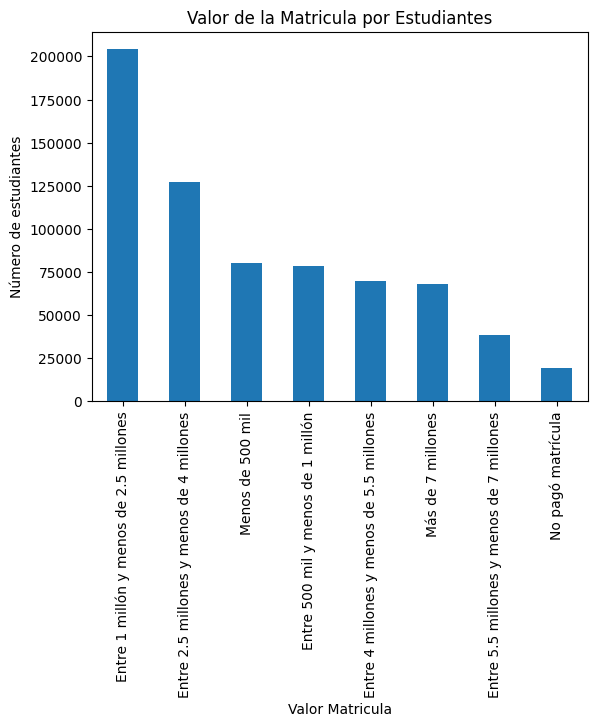

In [ ]:
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')
plt.xlabel("Valor Matricula")
plt.ylabel("Número de estudiantes")
plt.title("Valor de la Matricula por Estudiantes")

Text(0.5, 1.0, 'Estudiantes por departamento')

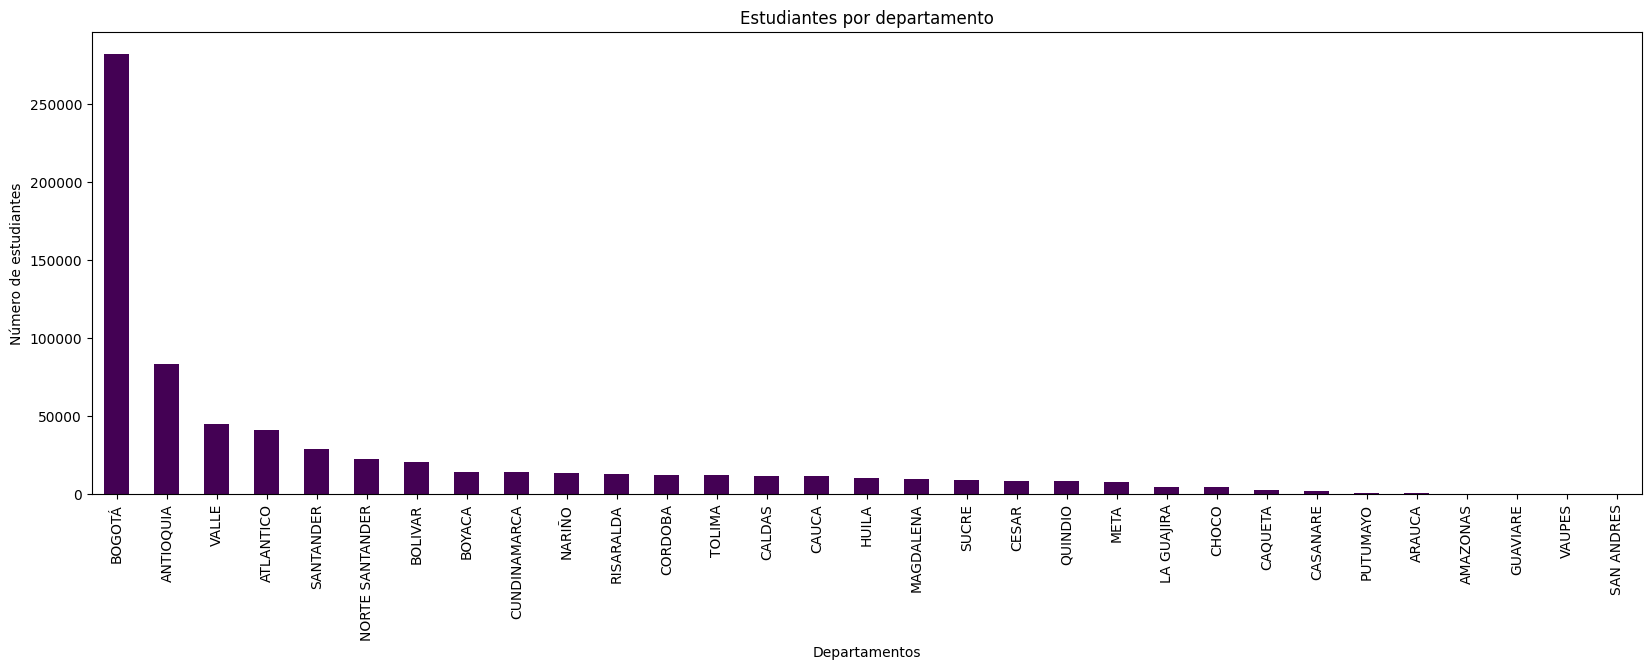

In [ ]:
a =z.ESTU_PRGM_DEPARTAMENTO.value_counts()

a.plot(kind='bar', stacked=True, figsize=(20,6), colormap='viridis')
plt.xlabel("Departamentos")
plt.ylabel("Número de estudiantes")
plt.title("Estudiantes por departamento")

Estrato de la vivienda

Text(0.5, 1.0, 'Estrato socieconómico de los estudiantes')

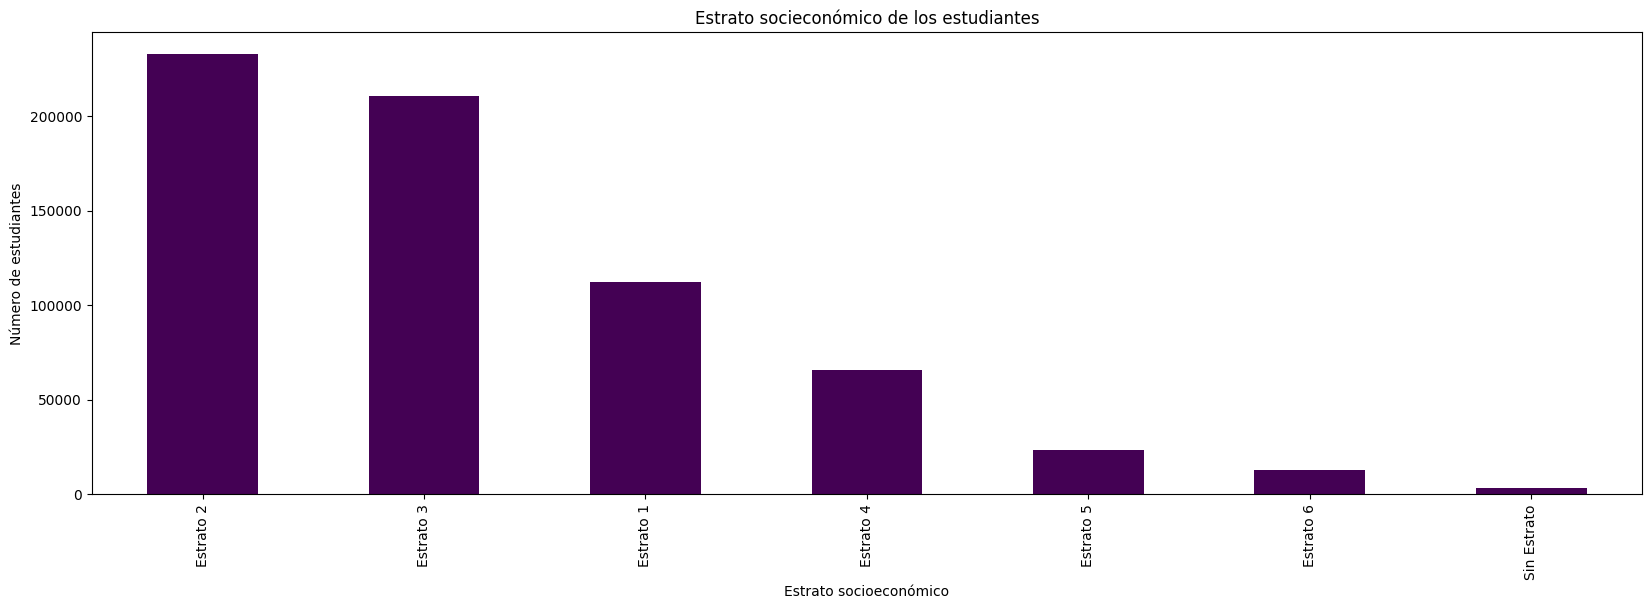

In [ ]:
a1= z.FAMI_ESTRATOVIVIENDA.value_counts()

a1.plot(kind='bar', stacked=True, figsize=(20,6), colormap='viridis')
plt.xlabel("Estrato socioeconómico")
plt.ylabel("Número de estudiantes")
plt.title("Estrato socieconómico de los estudiantes")

Relacion entre Valor de la matricula y el rendimiento del estudiante

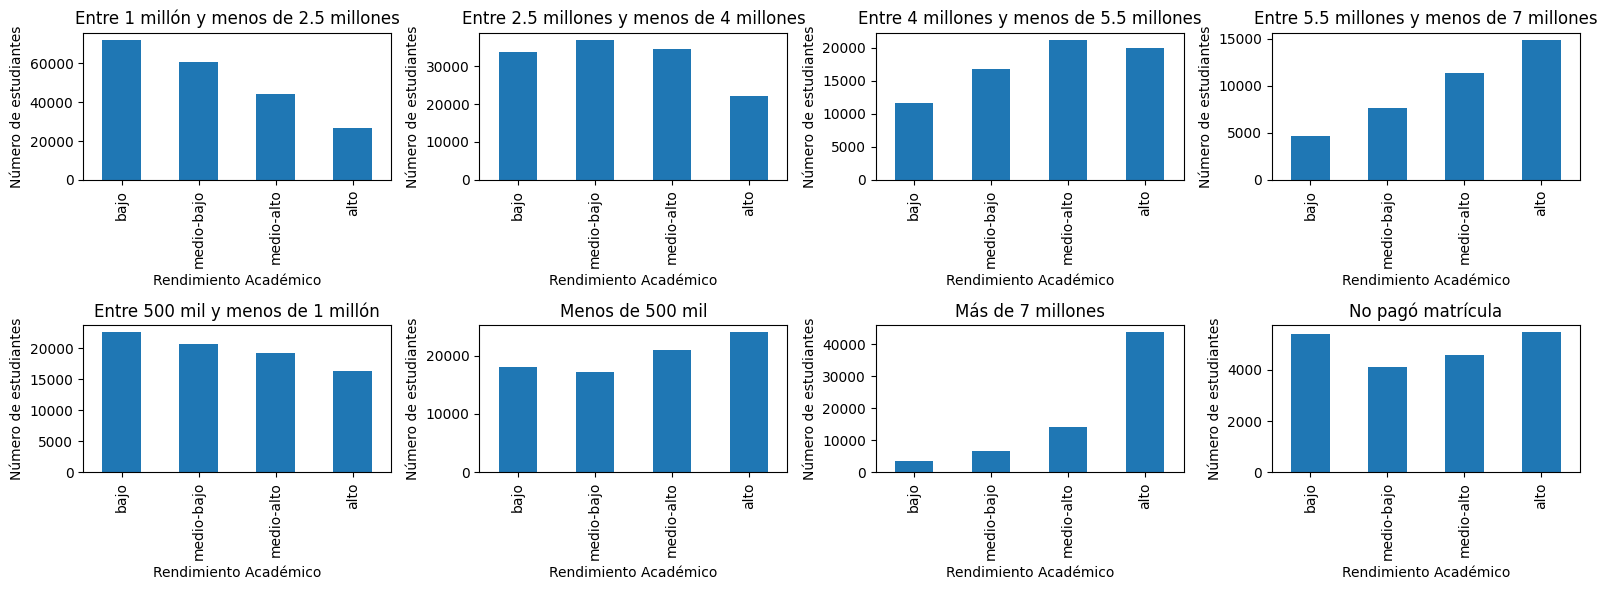

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_VALORMATRICULAUNIVERSIDAD==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)
    plt.xlabel("Rendimiento Académico")
    plt.ylabel("Número de estudiantes")